<a href="https://colab.research.google.com/github/puneet-08/projects/blob/main/SVM_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **SVM using Optimization Theory**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxopt

Defining Kernels

In [3]:
def gaussian(x,z,sigma = 0.1):
  return np.exp(-np.linalg.norm(x-z, axis =1)**2/(2*(sigma**2)))

def linear(x,z):
  return np.dot(x, z.T)

def polynomial(x,z , p =5):
  return (1 + np.dot(x,z.T))**p

SVM 

In [4]:
def SVM(X , y , X_test, kernel, C =5, threshold = 1e-5):
  m , n = X.shape
  

  K = np.zeros((m,m))

  for i in range(m):
    K[i,:] = kernel(X[i, :],X)

  P = cvxopt.matrix(np.outer(y,y) * K)
  q = cvxopt.matrix(-np.ones((m,1)))
  G = cvxopt.matrix(np.vstack((np.eye(m)*-1, np.eye(m))))
  h = cvxopt.matrix(np.hstack((np.zeros(m), np.ones(m)*C)))
  A = cvxopt.matrix(y, (1,m), 'd')
  b = cvxopt.matrix(np.zeros(1))

  cvxopt.solvers.options['show_progress'] = False
  sol = cvxopt.solvers.qp(P,q,G,h,A,b)

  alphas = np.array(sol['x'])

  #calculating parameters 
  sv = ((alphas > threshold) * (alphas < C)).flatten()
  w = np.dot(X[sv].T, alphas[sv]* y[sv].reshape(-1,1))
  b = np.mean(y[sv].reshape(-1,1) - alphas[sv] * y[sv].reshape(-1,1) *K[sv,sv].reshape(-1,1))

  #predicting
  y_predict = np.zeros(X_test.shape[0])

  for i in range(X_test.shape[0]):
    y_predict[i] = np.sum(alphas[sv]* y[sv].reshape(-1,1) * kernel(X_test[i], X[sv]).reshape(-1,1))
  
  return np.sign(y_predict + b)


Creating Dataset

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def create_dataset(N, D=2, K=2):
    X = np.zeros((N * K, D))  # data matrix (each row = single example)
    y = np.zeros(N * K)  # class labels

    for j in range(K):
        ix = range(N * j, N * (j + 1))
        r = np.linspace(0.0, 1, N)  # radius
        t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2  # theta
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = j
    
    y[y == 0] -= 1

    return X, y

def visualize_dataset(X,y):
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
  plt.show()


def plot_contour(X, y, SVM,kernel):
    # plot the resulting classifier
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    points = np.c_[xx.ravel(), yy.ravel()]

    Z = SVM(X,y,points,kernel)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

    # plt the points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.show()


Predicting

Visualizing Dataset


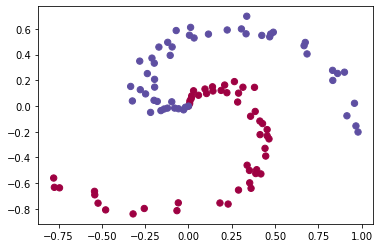



Linear Kernel
Accuracy: 0.78


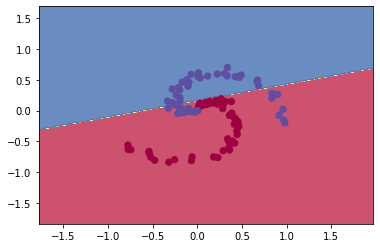



Polynomial Kernel
Accuracy: 0.99


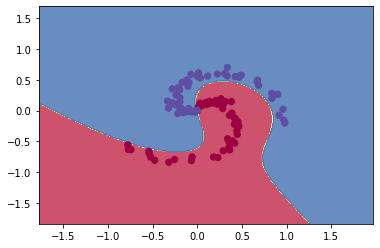



Gaussian Kernel
Accuracy: 0.99


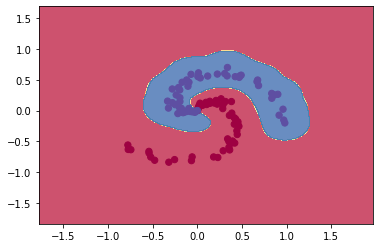

In [10]:
X, y = create_dataset(N=50)
print('Visualizing Dataset')
visualize_dataset(X,y)

print("\n")
y_pred = SVM(X,y,X,kernel=linear)
print("Linear Kernel")
print(f"Accuracy: {sum(y==y_pred)/y.shape[0]}")
plot_contour(X, y, SVM,kernel=linear)

print("\n")
y_pred = SVM(X,y,X,kernel=polynomial)
print("Polynomial Kernel")
print(f"Accuracy: {sum(y==y_pred)/y.shape[0]}")
plot_contour(X, y, SVM,kernel=polynomial)

print("\n")
y_pred = SVM(X,y,X,kernel=gaussian)
print("Gaussian Kernel")
print(f"Accuracy: {sum(y==y_pred)/y.shape[0]}")
plot_contour(X, y, SVM,kernel=gaussian)


References-

1. https://xavierbourretsicotte.github.io/SVM_implementation.html
2. Lectures 6,7 at https://www.youtube.com/playlist?list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU
3. https://www.youtube.com/watch?v=gBTtR0bs-1k&list=PLhhyoLH6IjfxpLWyOgBt1sBzIapdRKZmj&index=7
4. Code for creating dataset taken from - https://github.com/aladdinpersson/Machine-Learning-Collection/blob/master/ML/algorithms/svm/utils.py
